<a href="https://colab.research.google.com/github/raihanewubd/CSE457/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id 1OKcZ19cAwzZGDRjtcLHMIZslR2yGVISQ

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OKcZ19cAwzZGDRjtcLHMIZslR2yGVISQ
To: /content/Mall_Customers.csv
100% 4.29k/4.29k [00:00<00:00, 9.11MB/s]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [ ]:
dataset = pd.read_csv("Mall_Customers.csv", sep=",")
dataset.head()

In [ ]:
dataset.info()

In [ ]:
plt.figure(figsize=(10, 9))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=dataset, alpha=0.9)


In [ ]:
data_x = dataset.iloc[:, 3:5]
data_x.head()
x_array =  np.array(data_x)
print(x_array)

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

# Elbow Method

In [ ]:
Sum_of_squared_distances =[]
K = range(1,15)
for k in K:
    km =KMeans(n_clusters =k)
    km =km.fit(x_scaled)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=(2,8), metric='silhouette', timings=False)

visualizer.fit(x_scaled)
visualizer.poof()

In [ ]:
numerics = dataset[['Annual Income (k$)','Spending Score (1-100)']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for i in numerics:
        scaler.fit(dataset[[i]])
        dataset[i] = scaler.transform(dataset[[i]])
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(dataset[['Annual Income (k$)', 'Spending Score (1-100)']])
y_predicted

In [ ]:
dataset["Cluster"] = y_predicted
dataset.head(10)

In [ ]:
plt.figure(figsize=(12,8))
df1 = dataset[dataset.Cluster==0]
df2 = dataset[dataset.Cluster==1]
df3 = dataset[dataset.Cluster==2]
df4 = dataset[dataset.Cluster==3]
df5 = dataset[dataset.Cluster==4]
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green', label='Target Group')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='magenta', label='Sensible')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='orange', label='Careless')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='red', label='Careful')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='blue', label='Standard')
plt.title('Clustering Result', fontweight='bold',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=15)
plt.ylabel('Spending Score (1-100)',fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

# Hierarchical Clustering

In [ ]:
df = pd.read_csv("Mall_Customers.csv", sep=",")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


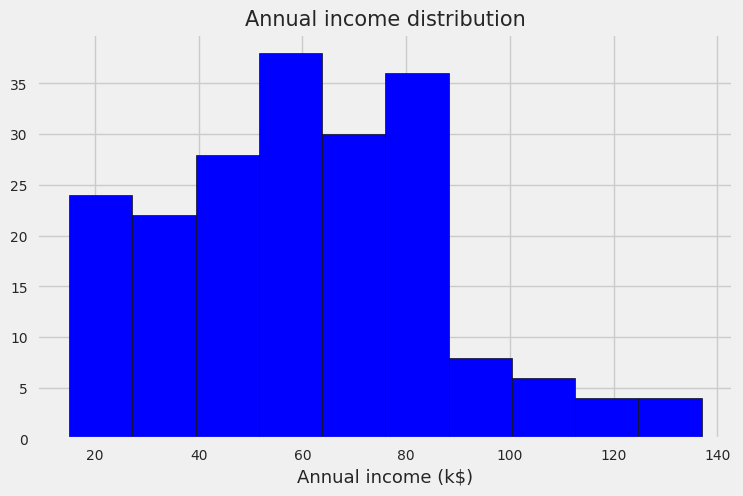

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Annual income distribution",fontsize=15)
plt.xlabel ("Annual income (k$)",fontsize=13)
plt.grid(True)
plt.hist(df['Annual Income (k$)'],color='blue',edgecolor='k')
plt.show()

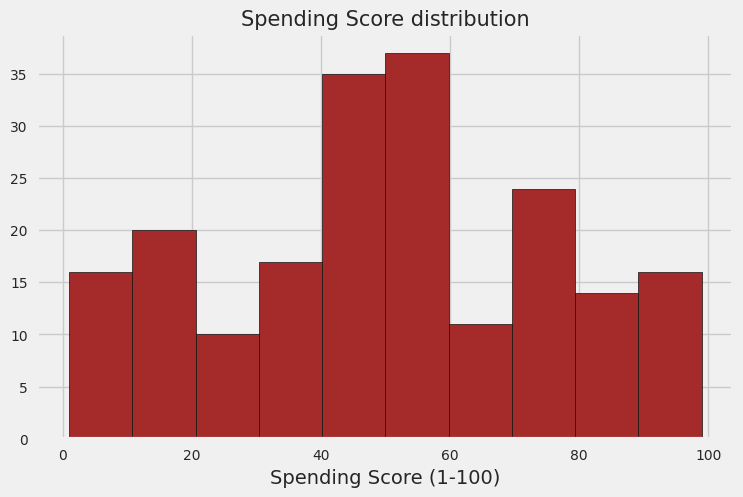

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Spending Score distribution",fontsize=15)
plt.xlabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.hist(df['Spending Score (1-100)'],color='brown',edgecolor='k')
plt.show()

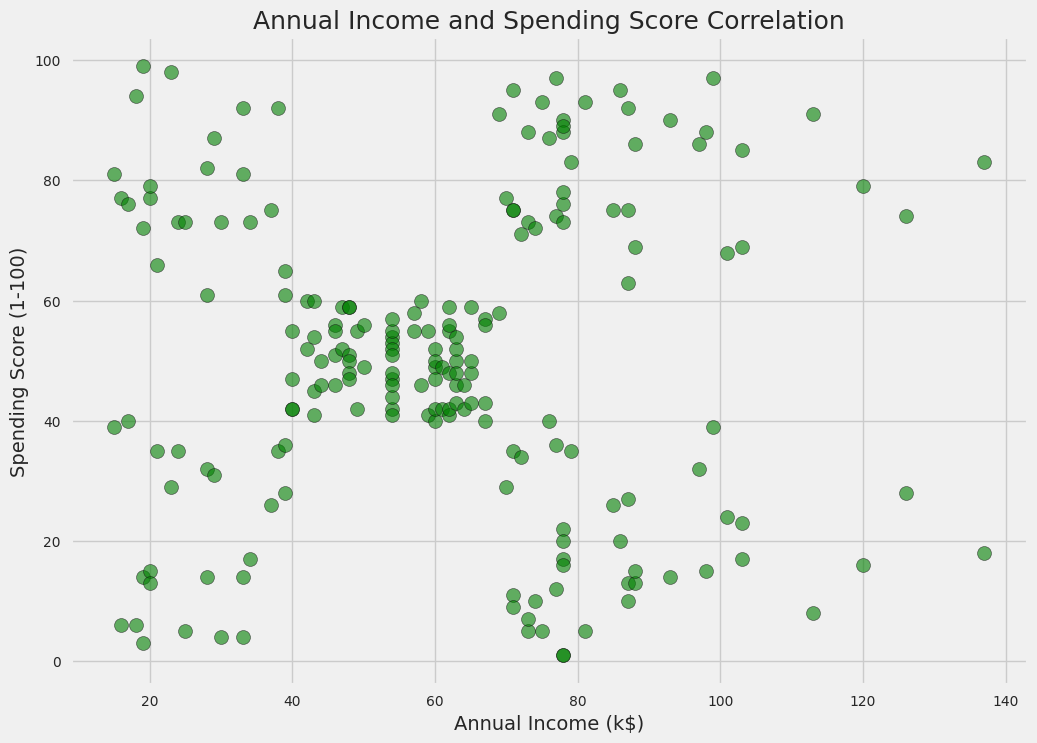

In [ ]:
plt.figure(figsize=(11,8))
plt.title("Annual Income and Spending Score Correlation",fontsize=18)
plt.xlabel ("Annual Income (k$)",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='green',edgecolor='k',alpha=0.6, s=100)
plt.show()

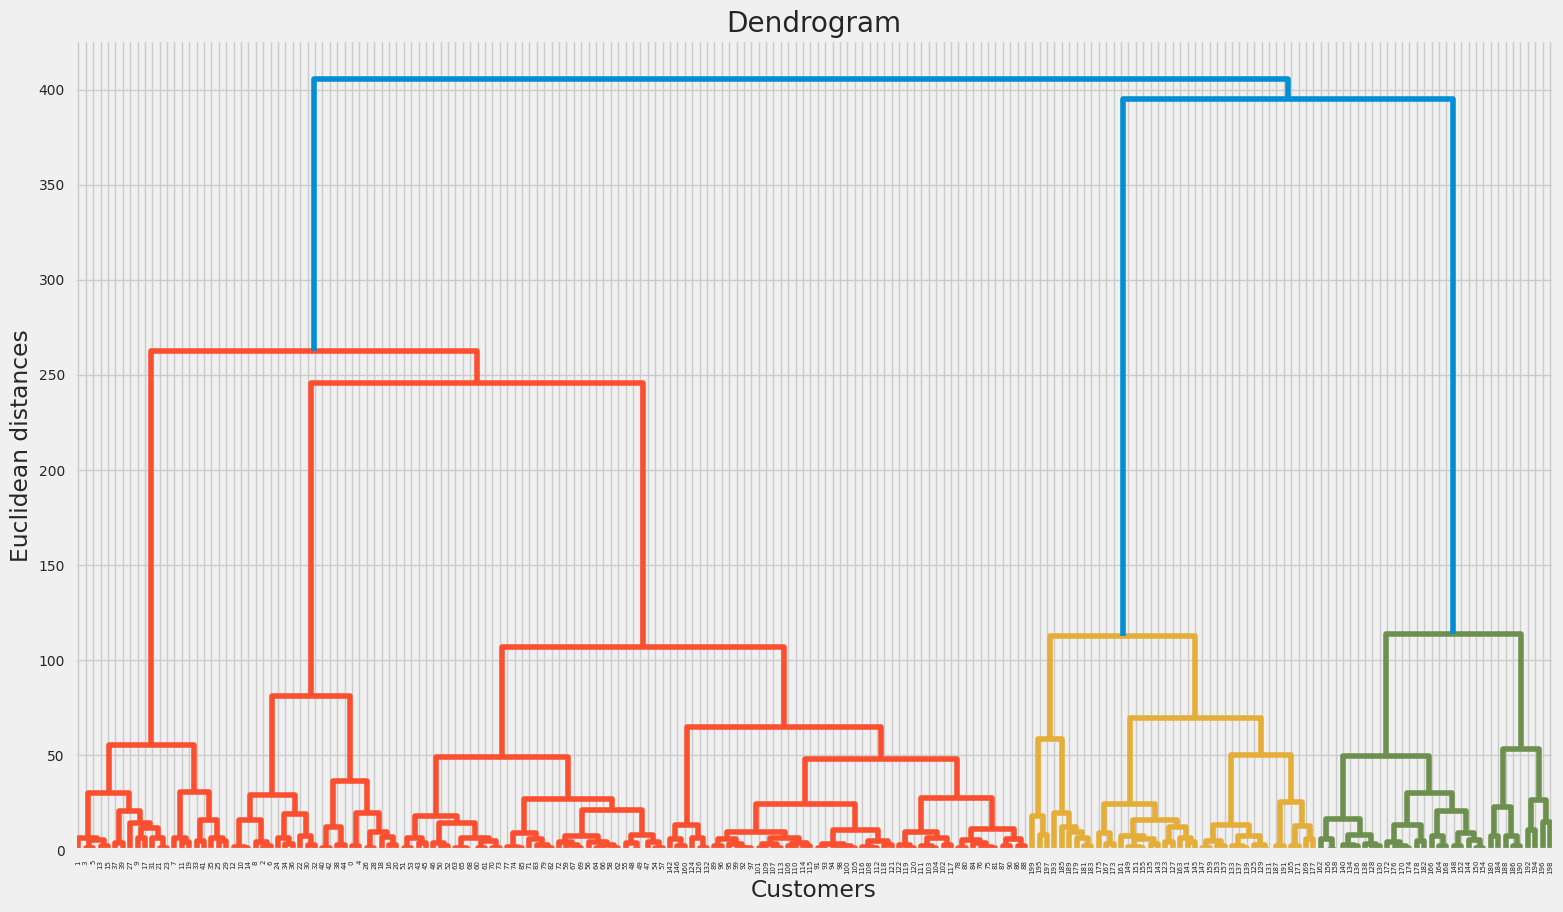

In [ ]:
X = df.iloc[:,[3,4]].values
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
plt.figure(figsize=(17,10))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

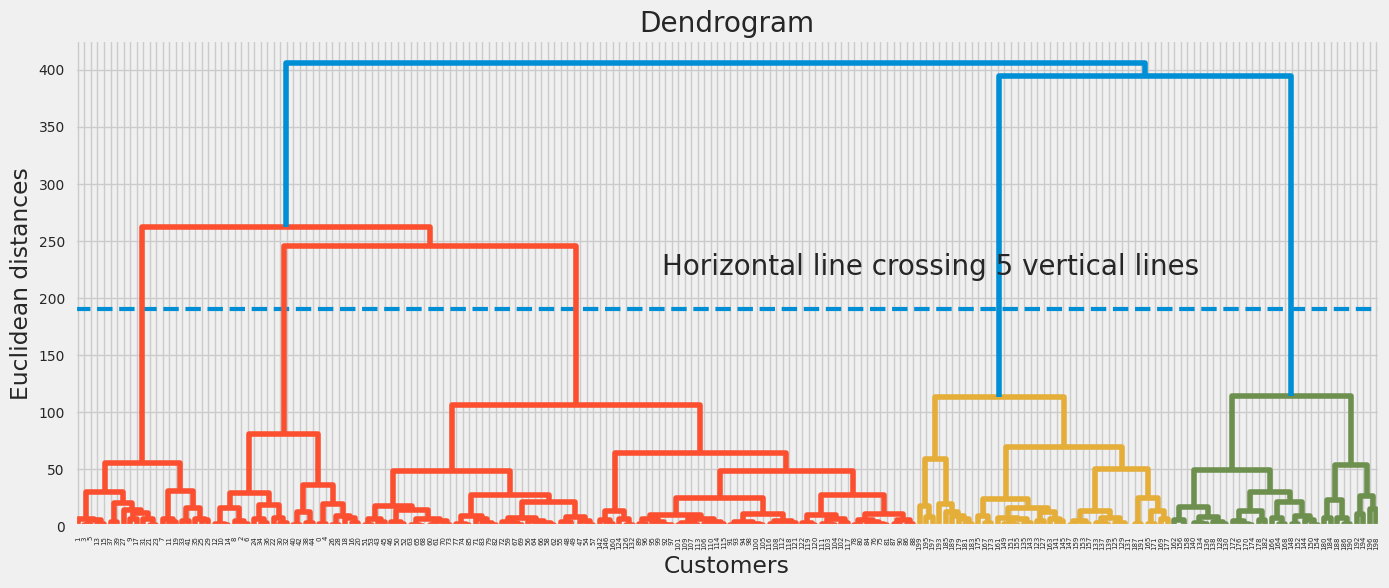

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.hlines(y=190,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=900,y=220,s='Horizontal line crossing 5 vertical lines',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

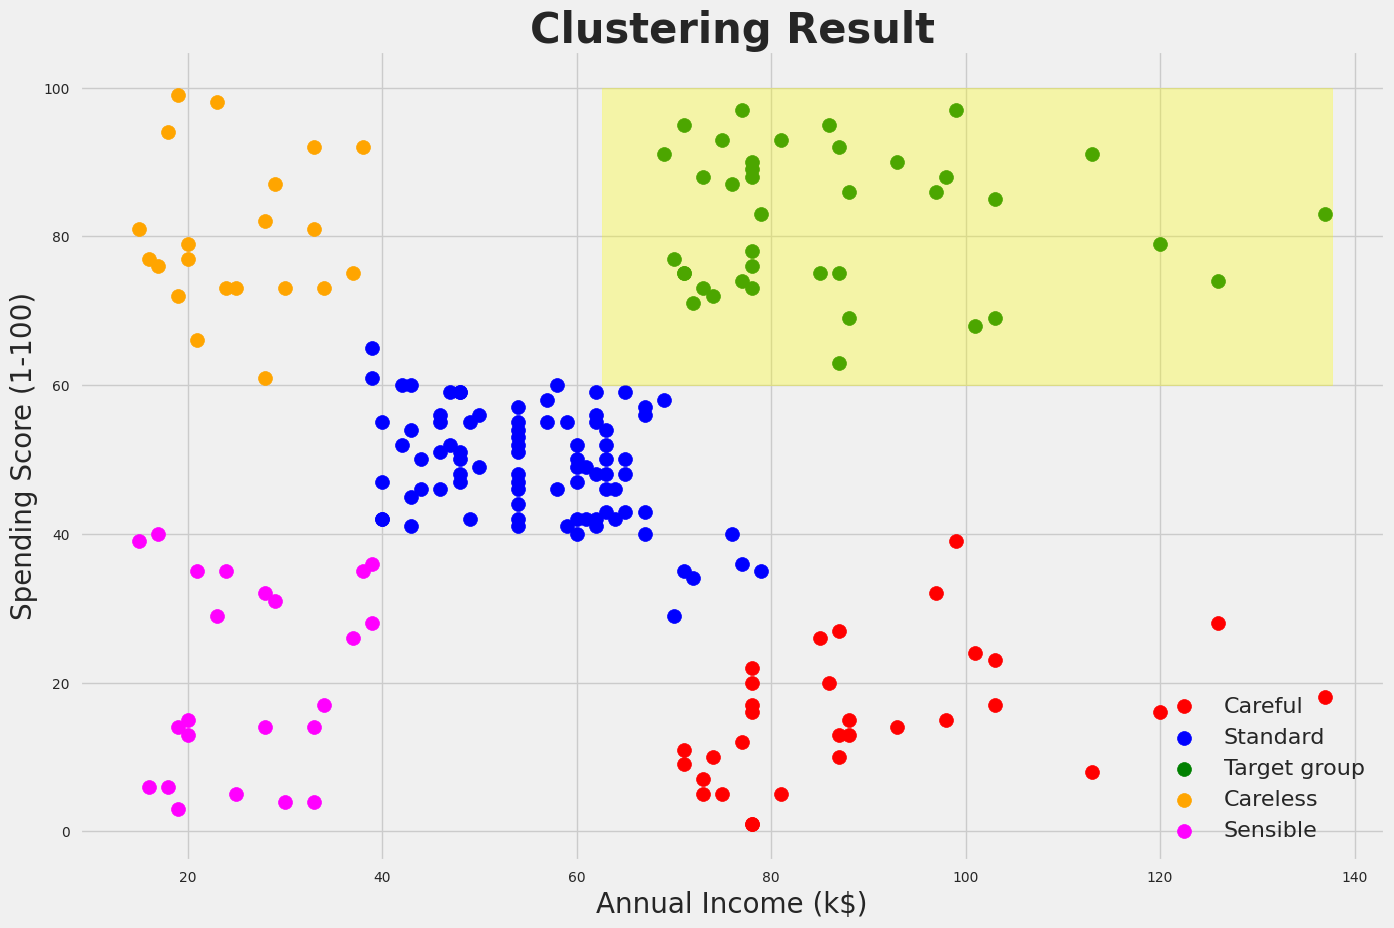

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_hc = hc.fit_predict(X)
plt.figure(figsize=(15,10))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target group')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'orange', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clustering Result', fontweight='bold',fontsize=30)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend(fontsize=16)
plt.grid(True)
plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
df = pd.read_csv("Mall_Customers.csv", sep=",")
Clus_dataSet = df[['Annual Income (k$)','Spending Score (1-100)']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
# Compute DBSCAN
db = DBSCAN(eps=0.4, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df['Clus_Db']=labels
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))
# A sample of clusters
print(df[['Annual Income (k$)','Spending Score (1-100)']].head())
# Number of Labels
print("number of labels: ", set(labels))

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40
number of labels:  {0, 1, 2, 3, -1}


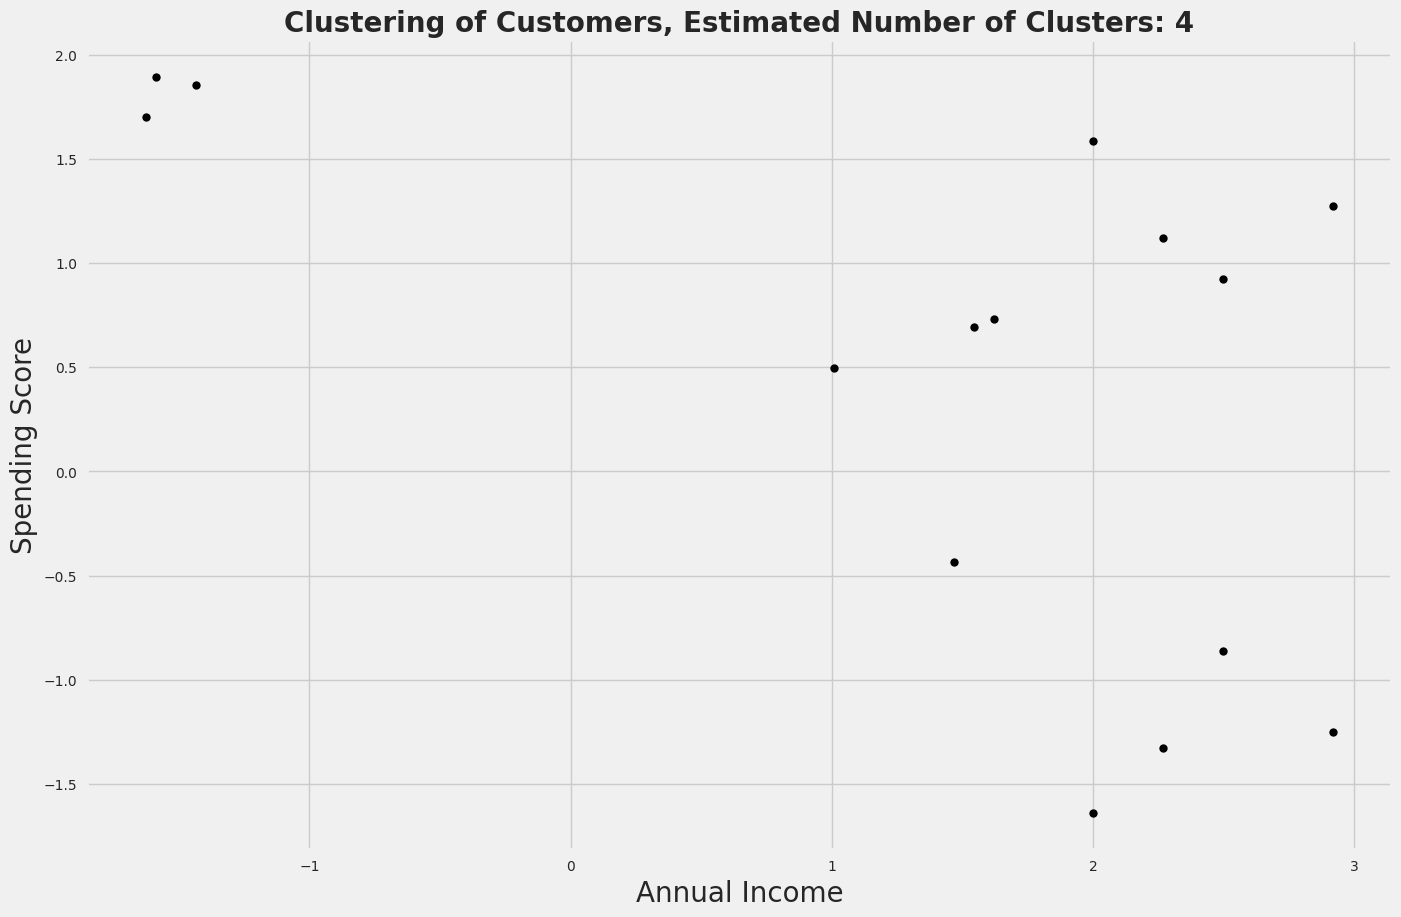

number of noise(s):  15


In [ ]:
# Black removed and is used for noise instead
plt.figure(figsize=(15,10))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:

        # Black used for noise.
        col = [0, 0, 0, 1]
class_member_mask = (labels == k)
xy = Clus_dataSet[class_member_mask & core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=6)
plt.title('Clustering of Customers, Estimated Number of Clusters: %d' % realClusterNum, fontweight='bold',fontsize=20)
plt.xlabel('Annual Income',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend(fontsize=20)
plt.show()
n_noise_ = list(labels).count(-1)
print('number of noise(s): ', n_noise_)

In [ ]:
for clust_number in set(labels):
    clust_set = df[df.Clus_Db == clust_number]
    if clust_number != -1:
        print ("Cluster "+str(clust_number)+', Avg Annual Income: '+ str(round(np.mean(clust_set.Annual_Income)))+\
               ', Avg Spending Score: '+ str(round(np.mean(clust_set['Spending_Score'])))+\
               ', Count: '+ str(np.count_nonzero(clust_set.index)))

AttributeError: 'DataFrame' object has no attribute 'Annual_Income'

In [ ]:
for clust_number in set(labels):
    clust_set = df[df.Clus_Db == clust_number]
    if clust_number != -1:
        # Accessing columns using the correct names from the original DataFrame
        print ("Cluster "+str(clust_number)+', Avg Annual Income: '+ str(round(np.mean(clust_set['Annual Income (k$)'])))+\
               ', Avg Spending Score: '+ str(round(np.mean(clust_set['Spending Score (1-100)'])))+\
               ', Count: '+ str(np.count_nonzero(clust_set.index)))

Cluster 0, Avg Annual Income: 48, Avg Spending Score: 52, Count: 114
Cluster 1, Avg Annual Income: 24, Avg Spending Score: 9, Count: 11
Cluster 2, Avg Annual Income: 81, Avg Spending Score: 84, Count: 32
Cluster 3, Avg Annual Income: 84, Avg Spending Score: 14, Count: 27
